### Lab9
### Date : 28/10/2022
### Exer 1: Clustering
### Name : Kartabya Krishna
### RegNo : 210968244
### Batch : 4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_excel("Online Retail.xlsx")
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### *Data Cleaning


In [6]:
#getting rid of NA values
dataset=dataset.dropna()
print(dataset.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
dataset.duplicated().sum()

5225

In [8]:
#cleaning duplicate values
dataset=dataset.drop_duplicates()
dataset.duplicated().sum()

0

### Q1. Read and write a summary of the metadata .

In [9]:
print(pd.DataFrame(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB
Empty DataFrame
Columns: []
Index: []


In [10]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Q2. Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset

In [11]:
dataset.set_index("InvoiceDate",inplace = True)

In [12]:
df= dataset[(dataset.index>='2011-04-01') & (dataset.index<='2011-12-09')]
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-04-01 08:22:00,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22296,HEART IVORY TRELLIS LARGE,12,1.65,18161.0,United Kingdom
2011-04-01 08:22:00,548550,21790,VINTAGE SNAP CARDS,12,0.85,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,9.95,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-08 20:01:00,581474,21253,SET OF PICTURE FRAME STICKERS,1,0.79,12748.0,United Kingdom
2011-12-08 20:01:00,581474,22108,PING! MICROWAVE PLATE,1,1.25,12748.0,United Kingdom
2011-12-08 20:01:00,581474,22167,OVAL WALL MIRROR DIAMANTE,1,9.95,12748.0,United Kingdom


### Q3. Calculate the RFM values for each customer (by customer id). RFM represents:

In [13]:
# R
df['R'] = 12-df.index.month


# F
df['F'] = 0
customer_ids = list(df['CustomerID'].unique())
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'F'] += df.groupby(by='CustomerID').InvoiceNo.size()[id]


# M
df['Revenue'] = df.Quantity * df.UnitPrice
df['M'] = 0
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'M'] += df.groupby(by='CustomerID').Revenue.sum()[id]


#creating a new dataframe.
df_rfm = pd.DataFrame(customer_ids, columns=['Customer ID'])

df_rfm['R'] = 0
df_rfm['F'] = 0
df_rfm['M'] = 0

# updating columns
for id in customer_ids:
    df_rfm.loc[df_rfm['Customer ID']==id, 'R'] += df.loc[df['CustomerID']==id, 'R'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'F'] += df.loc[df['CustomerID']==id, 'F'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'M'] += df.loc[df['CustomerID']==id, 'M'].values[0]

C:\Users\dse\AppData\Local\Temp/ipykernel_3680/3983345773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = 12-df.index.month
C:\Users\dse\AppData\Local\Temp/ipykernel_3680/3983345773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Q4. Use the elbow method to identify how many customer segments exist, using the RFM values for each customer.

In [25]:
print("No of customer segments that exit is :")
print(df_rfm['R'].unique().size)
print("They are :")
df_rfm['R'].unique()

No of customer segments that exit is :
9
They are :


array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

### Q5. Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

In [15]:
from sklearn.cluster import KMeans

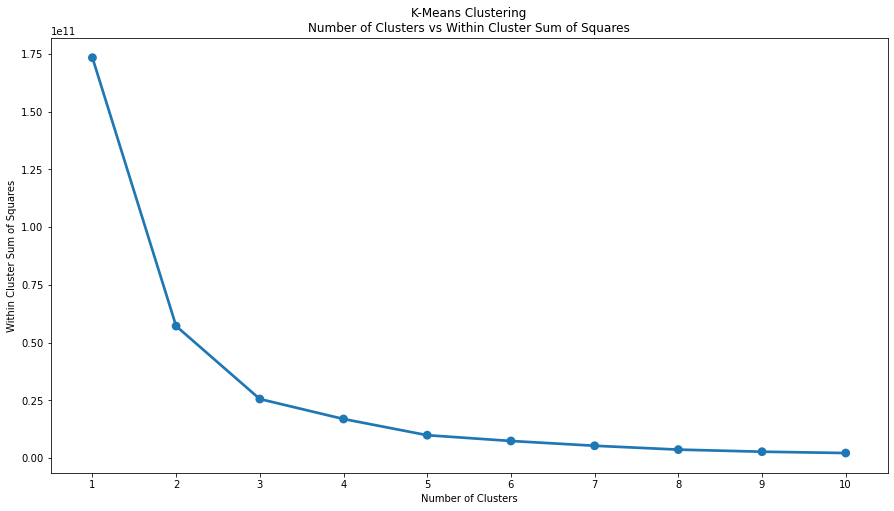

In [16]:
# creating a list to store the within-the-cluster-sum-of-squared-distance
wcss = []

# sorting wcss
for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(df_rfm[['R', 'F', 'M']])
  wcss.append(kmeans.inertia_)

# plot of "" wcss vs number of clusters ""
plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

### Q6. Plot the clusters in a scatter plot and mark each segment differently using lmplot

In [17]:
# kmeans model
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_rfm[['R', 'F', 'M']])

In [18]:
# generating cluster labels
df_rfm['labels'] = kmeans.labels_

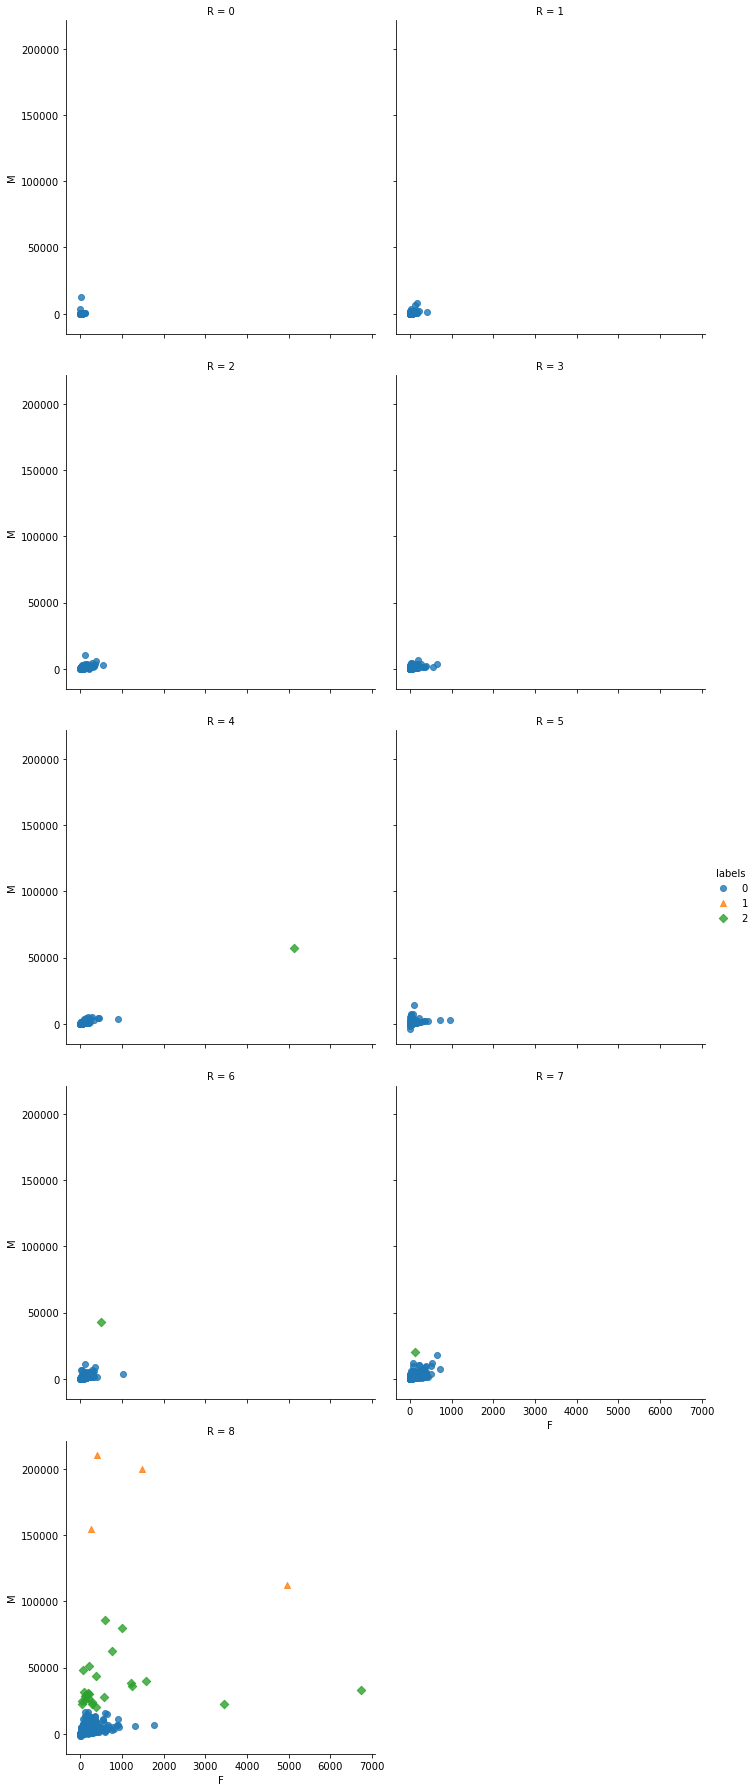

In [19]:
# visualizing the clusters
sns.lmplot(x='F', y='M', col='R', hue='labels', data=df_rfm, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])

### Q7.  Print the cluster centers of each customer segment and explain them intuitively.

In [20]:
# cluster centres ::
print("The cluster centres are :")
print(kmeans.cluster_centers_)
print()
print("The cluster centre of cluster:")
print("0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.")
print()
print("1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers who should be entered in the Loyalty Program and given special benefits.")
print()
print("2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers - should be sent more promos and offers.")
print()
print("The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)")

The cluster centres are :
[[5.04007286e+00 7.09529014e+01 1.18076095e+03]
 [8.00000000e+00 1.77400000e+03 1.69376578e+05]
 [7.74074074e+00 9.45962963e+02 3.73182656e+04]]

The cluster centre of cluster:
0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.

1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers who should be entered in the Loyalty Program and given special benefits.

2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers - should be sent more promos and offers.

The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)


### Q8. Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.
#### from sklearn.cluster import AgglomerativeClustering

In [21]:
# agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(df_rfm[['R','F','M']])

### Q9. Visualize the clusters using the dendrogram 

In [22]:
# importing dendrogram
from scipy.cluster.hierarchy import dendrogram

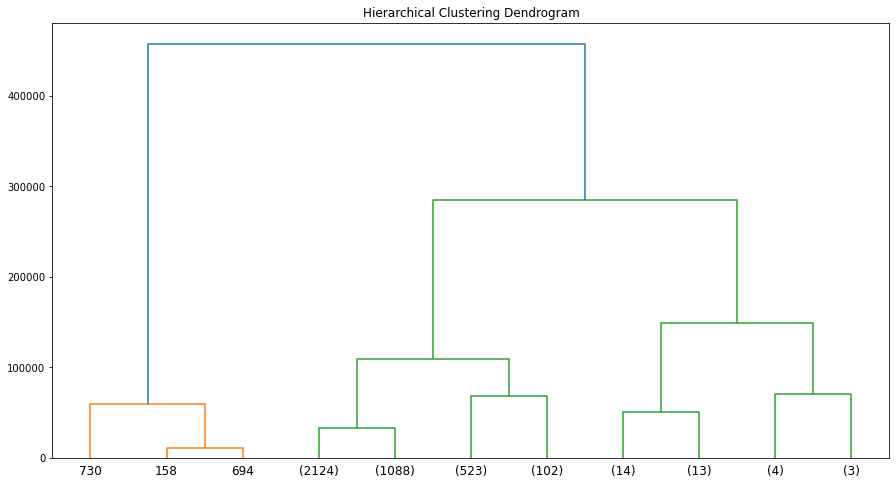

In [23]:
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

### Q10. Compare the clusters obtained using KMeans vs. Agglomeration

In [24]:
#list of labels generated by the kmeans model
labels_kmeans = list(kmeans.labels_)

#list of labels generated by the agglomerative clustering model
labels_agglo = list(agglo.labels_)

print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))
print()
print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

Cluster 0 - KMeans:  3843
Cluster 1 - KMeans:  4
Cluster 2 - KMeans:  27

Cluster 0 - Agglomerative:  34
Cluster 1 - Agglomerative:  3
Cluster 2 - Agglomerative:  3837
